source：https://github.com/AlexLynd/ESP8266-Wardriving

gathered the rata by walking around with WiGLE, exported to csv

filter data by different criteria, plot on the map

# plot all WCDMA towers

In [193]:
import numpy as np
import pandas as pd
import folium
from folium import Map, Marker
import random
import matplotlib.pyplot as plt
color_list = ['black', 'darkblue', 'cadetblue', 'pink', 'darkred', 'white', 'orange', 'purple', 'lightblue', 'darkpurple', 'gray', 'red', 'lightgray', 'lightred', 'green', 'darkgreen', 'beige', 'lightgreen', 'blue']


In [ ]:
wd = pd.read_csv ('WigleWifi_20210904231046.csv', skiprows=1) 
wd

In [ ]:
# drop all else except WCDMA
wd = pd.DataFrame( wd.loc[wd['Type'] == "WCDMA"] )
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd['MAC'].value_counts()

In [197]:
#color code different MACs
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['MAC'] == wd['MAC'][index],"Color"] = random.choice(color_list)

In [ ]:
pd.DataFrame (wd, columns=['Color','MAC']).value_counts()

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# folium.PolyLine(wd[['CurrentLatitude', 'CurrentLongitude']].values.tolist(),line_opacity = 0.5, weight = 4).add_to(basic_map) # plot route

# add markers for every point in dataset 
for i in range(len(wd)): 
#     if wd["FirstSeen"][i] > "2021-8-21 18:43:25" and wd["FirstSeen"][i] < "2021-8-21 18:46:58": # add time filter
#     if wd["RSSI"][i] > 10:
    if wd.loc[wd['MAC'] == wd['MAC'][i],"RSSI"].max() == wd["RSSI"][i]:# only plot with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i] 
        folium.Marker( location=[lat, lon], tooltip=f'MAC {wd["MAC"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total towers: {len(wd['MAC'].unique())}")        
display(basic_map)

# plot all WIFI APs with highest signal strength

In [ ]:
wd = pd.read_csv ('WigleWifi_20210904231046.csv', skiprows=1) 
wd.sample(5)

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 
    if wd.loc[wd['SSID'] == wd['SSID'][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'SSID {wd["SSID"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color="blue", prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

# plot all WPS-enabled wifi with highest signal strength

In [202]:
wd = pd.read_csv ('WigleWifi_20210904231046.csv', skiprows=1)
print(f"total devices: {len(wd)}") # number of detected devices

total devices: 2875


In [203]:
wd['AuthMode'].value_counts()

[WPA-PSK-CCMP][WPA2-PSK-CCMP][ESS]                   802
[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS]         588
[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS]    465
[WPA-PSK-CCMP][WPA2-PSK-CCMP][WPS][ESS]              382
[WPA2-PSK-CCMP][ESS]                                 162
[ESS]                                                160
[WPA2-PSK-CCMP][WPS][ESS]                            154
WCDMA;46001                                           69
[WPA2-PSK-CCMP+TKIP][ESS]                             37
[WPS][ESS]                                            12
[WPA-PSK-CCMP][ESS]                                    9
[WPA2-PSK-CCMP][WPS][ESS][P2P]                         6
[WPA-PSK-TKIP][WPA2-PSK-CCMP][WPS][ESS]                5
[WPA-PSK-CCMP][WPA2-PSK+FT/PSK-CCMP][ESS]              5
[WEP][ESS]                                             3
[WPA-PSK-CCMP+TKIP][ESS]                               3
[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP][ESS]                3
[WPA-PSK-TKIP][WPA2-PSK-CCMP][E

In [204]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

,Auth_sorted,counts
0,[WPA-PSK-CCMP][WPA2-PSK-CCMP][ESS],802
1,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],588
2,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],465
3,[WPA-PSK-CCMP][WPA2-PSK-CCMP][WPS][ESS],382
4,[WPA2-PSK-CCMP][ESS],162
5,[ESS],160
6,[WPA2-PSK-CCMP][WPS][ESS],154
7,WCDMA;46001,69
8,[WPA2-PSK-CCMP+TKIP][ESS],37
9,[WPS][ESS],12


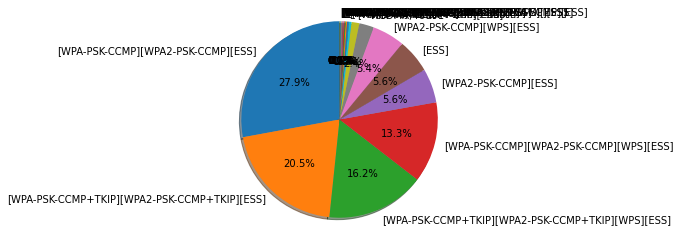

In [205]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [206]:
ap_total=len(wd)
ap_use_wps=len(pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.find('WPS') != -1), :]))

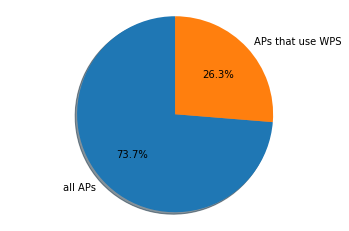

In [207]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "all APs", "APs that use WPS"
sizes = [ap_total, ap_use_wps]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# drop all except those that use WPS
wd = pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.find('WPS') != -1), :])
wd = wd.reset_index(drop=True)
wd.sample(5)

In [209]:
wd['AuthMode'].value_counts()

[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS]    465
[WPA-PSK-CCMP][WPA2-PSK-CCMP][WPS][ESS]              382
[WPA2-PSK-CCMP][WPS][ESS]                            154
[WPS][ESS]                                            12
[WPA2-PSK-CCMP][WPS][ESS][P2P]                         6
[WPA-PSK-TKIP][WPA2-PSK-CCMP][WPS][ESS]                5
[WPA2-PSK-CCMP+TKIP][WPS][ESS]                         1
Name: AuthMode, dtype: int64

In [210]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

,Auth_sorted,counts
0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],465
1,[WPA-PSK-CCMP][WPA2-PSK-CCMP][WPS][ESS],382
2,[WPA2-PSK-CCMP][WPS][ESS],154
3,[WPS][ESS],12
4,[WPA2-PSK-CCMP][WPS][ESS][P2P],6
5,[WPA-PSK-TKIP][WPA2-PSK-CCMP][WPS][ESS],5
6,[WPA2-PSK-CCMP+TKIP][WPS][ESS],1


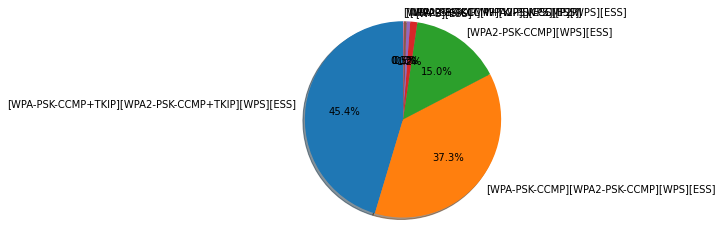

In [211]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [212]:
#color code authmodes
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['AuthMode'] == wd['AuthMode'][index],"Color"] = random.choice(color_list)

In [213]:
pd.DataFrame (wd, columns=['Color','AuthMode']).value_counts()

Color       AuthMode                                         
green       [WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS]    465
purple      [WPA-PSK-CCMP][WPA2-PSK-CCMP][WPS][ESS]              382
lightgreen  [WPA2-PSK-CCMP][WPS][ESS]                            154
lightred    [WPS][ESS]                                            12
blue        [WPA2-PSK-CCMP][WPS][ESS][P2P]                         6
lightgray   [WPA-PSK-TKIP][WPA2-PSK-CCMP][WPS][ESS]                5
purple      [WPA2-PSK-CCMP+TKIP][WPS][ESS]                         1
dtype: int64

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 

    if wd.loc[wd['SSID'] == wd['SSID'][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'SSID {wd["SSID"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)